<a href="https://colab.research.google.com/github/Mozuha/Oxford-Flower-102-Prediction/blob/master/oxflower_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
num_classes = 102
batch_size = 64
img_size = 224
epochs = 30
num_train = 6551
num_val = 1638
label = ["pink primrose", "hard-leaved pocket orchid", "canterbury bells", "sweet pea", "english marigold", "tiger lily", "moon orchid",
        "bird of paradise", "monkshood", "globe thistle", "snapdragon", "colt's foot", "king protea", "spear thistle", "yellow iris",
        "globe-flower", "purple coneflower", "peruvian lily", "balloon flower", "giant white arum lily", "fire lily", "pincushion flower", "fritillary",
        "red ginger", "grape hyacinth", "corn poppy", "prince of wales feathers", "stemless gentian", "artichoke", "sweet william", "carnation",
        "garden phlox", "love in the mist", "mexican aster", "alpine sea holly", "ruby-lipped cattleya", "cape flower", "great masterwort", "siam tulip",
        "lenten rose", "barbeton daisy", "daffodil", "sword lily", "poinsettia", "bolero deep blue", "wallflower", "marigold", "buttercup", "oxeye daisy",
        "common dandelion", "petunia", "wild pansy", "primula", "sunflower", "pelargonium", "bishop of llandaff", "gaura", "geranium", "orange dahlia",
        "pink-yellow dahlia?", "cautleya spicata", "japanese anemone", "black-eyed susan", "silverbush", "californian poppy", "osteospermum",
        "spring crocus", "bearded iris", "windflower", "tree poppy", "gazania", "azalea", "water lily", "rose", "thorn apple", "morning glory",
        "passion flower", "lotus", "toad lily", "anthurium", "frangipani", "clematis", "hibiscus", "columbine", "desert-rose", "tree mallow",
        "magnolia", "cyclamen", "watercress", "canna lily", "hippeastrum", "bee balm", "ball moss", "foxglove", "bougainvillea", "camellia", "mallow",
        "mexican petunia", "bromelia", "blanket flower", "trumpet creeper", "blackberry lily"]

In [3]:
train_dir = '/content/drive/My Drive/X_train'
val_dir = '/content/drive/My Drive/X_test'

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.5,
    shear_range=0.2
    )
    
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=batch_size,
#     classes=label,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=batch_size,
#     classes=label,
    class_mode='categorical',
    shuffle=True
)

Found 6551 images belonging to 102 classes.
Found 1638 images belonging to 102 classes.


In [5]:
base_model = MobileNetV2(input_shape=(img_size, img_size, 3), alpha=0.5, include_top=False, weights='imagenet')

3203072/3201480 [==============================] - 0s 0us/step


In [16]:
len(base_model.layers)

155

In [7]:
base_model.layers[105:]

In [8]:
for layer in base_model.layers[:105]:
  layer.trainable = False
for layer in base_model.layers[105:]:
  layer.trainable = True

# base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)
# x = Dense(512, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-4),
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
             
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 16) 432         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 16) 64          Conv1[0][0]                      
______________________________________________________________________________________________

In [9]:
history = model.fit(
    train_gen,
    steps_per_epoch=num_train//batch_size,
    epochs=60,
    validation_data=val_gen,
    validation_steps=num_val//batch_size
)

Epoch 1/60
102/102 [==============================] - 5130s 50s/step - loss: 4.5151 - accuracy: 0.1609 - val_loss: 4.4892 - val_accuracy: 0.2406
Epoch 2/60
102/102 [==============================] - 129s 1s/step - loss: 4.3422 - accuracy: 0.3259 - val_loss: 4.4124 - val_accuracy: 0.2706
Epoch 3/60
102/102 [==============================] - 129s 1s/step - loss: 4.2543 - accuracy: 0.4164 - val_loss: 4.3076 - val_accuracy: 0.3731
Epoch 4/60
102/102 [==============================] - 128s 1s/step - loss: 4.1897 - accuracy: 0.4797 - val_loss: 4.2096 - val_accuracy: 0.4619
Epoch 5/60
102/102 [==============================] - 128s 1s/step - loss: 4.1409 - accuracy: 0.5220 - val_loss: 4.1700 - val_accuracy: 0.4956
Epoch 6/60
102/102 [==============================] - 128s 1s/step - loss: 4.1011 - accuracy: 0.5670 - val_loss: 4.1253 - val_accuracy: 0.5394
Epoch 7/60
102/102 [==============================] - 128s 1s/step - loss: 4.0664 - accuracy: 0.5958 - val_loss: 4.0853 - val_accuracy: 0.57

In [10]:
model.save('oxflower_mobilenetv2_L105.h5')

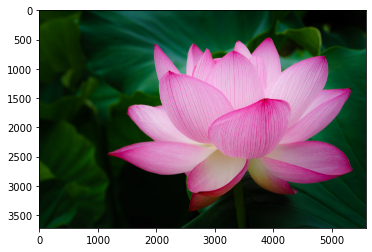

In [12]:
img = Image.open('lotus1.jpg').convert('RGB')
plt.imshow(img)

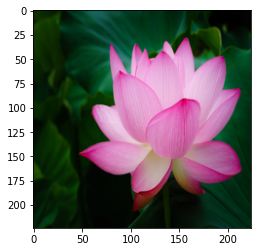

In [13]:
img = img.resize((224, 224))
plt.imshow(img)

In [14]:
im2arr = np.array(img)
print(type(im2arr))
print(im2arr.shape)

<class 'numpy.ndarray'>
(224, 224, 3)


In [15]:
im2arr = im2arr.reshape(1, 224, 224, 3)
print(im2arr.shape)

(1, 224, 224, 3)


In [16]:
im2arr = im2arr.astype('float32')
im2arr = im2arr / 255.0

In [21]:
pred = model.predict(im2arr)
print(-np.sort(-pred))

[[9.99996424e-01 2.99920066e-06 4.63053510e-07 8.92990144e-08
  1.63263643e-08 1.51544981e-08 9.82365478e-09 3.04176395e-09
  2.15989360e-09 1.92389105e-09 1.23312571e-09 9.37266709e-10
  8.52936999e-10 7.89567856e-10 7.15615400e-10 5.80626103e-10
  3.38771178e-10 3.31979305e-10 2.98659042e-10 2.91613733e-10
  2.45965581e-10 2.39889109e-10 1.94996477e-10 1.83708132e-10
  1.72953138e-10 1.35885622e-10 1.34984871e-10 9.86177459e-11
  4.90265710e-11 4.50909414e-11 4.10236740e-11 3.85420688e-11
  3.76958083e-11 3.29927578e-11 3.29659008e-11 2.95495989e-11
  2.19471264e-11 1.52774130e-11 1.52203493e-11 1.39062902e-11
  1.38640210e-11 1.32491414e-11 1.31233635e-11 1.13808294e-11
  8.20479708e-12 6.01736196e-12 5.53885583e-12 5.28396337e-12
  5.21410302e-12 3.05304154e-12 3.01524582e-12 2.52665141e-12
  2.49097878e-12 2.42906953e-12 1.50588353e-12 1.42002902e-12
  1.11609333e-12 1.01667589e-12 1.00084329e-12 7.70960119e-13
  7.67632214e-13 7.62033448e-13 7.59605595e-13 7.31928190e-13
  7.0346

In [22]:
keys = train_gen.class_indices.keys()
label_names = [] 
for key in keys:
  label_names.append(key)
label_names[np.argmax(pred)]

'lotus'